# **Task 1: Data Scraping and Preparation**

**Step 1:** Scrape your competitor’s data

In [ ]:
#import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
# Get html data from url
request = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')

In [ ]:
root = BeautifulSoup(request.content,'html5lib')

In [ ]:
# Get table data
table = root.find('table')

Use pandas to read in the HTML file; make sure the above data is properly typecast

In [ ]:
# Create new Table
data_table = pd.DataFrame(columns=['rank', 'x_class', 'date', 'region', 'starting_time', 'maximum_time', 'ending_time', 'movie_name'], index = range(0,50))

In [ ]:
# Put data in table
create_row = 0
#loop to create table rows
for row in table.find_all('tr'):
    create_column = 0
    #find all rows for eacg column
    columns = row.find_all('td')
    create_row=create_row+1
    for column in columns:
        if (create_row > 1):
            data_table.iat[create_row-2,create_column] = column.get_text()
            create_column += 1

**Step 2:** Tidy the top 50 solar flare data

In [ ]:
# Drop the last column
updated_table = data_table.drop('movie_name', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
updated_table.dtypes

rank             object
x_class          object
date             object
region           object
starting_time    object
maximum_time     object
ending_time      object
dtype: object

Use datetime import to combine the date and each of the three time columns into three datetime columns.

In [ ]:
# Convert datetime format by combining date and time attribute
date_st = pd.to_datetime(updated_table['date'] + ' ' + updated_table['starting_time'])
date_mt = pd.to_datetime(updated_table['date'] + ' ' + updated_table['maximum_time'])
date_et = pd.to_datetime(updated_table['date'] + ' ' + updated_table['ending_time'])

In [ ]:
# Add the new columns of the datetimes to table
updated_table['start_datetime'] = date_st
updated_table['max_datetime'] = date_mt
updated_table['end_datetime'] = date_et


In [ ]:
# Drop the irrelevant columns
updated_table = updated_table.drop('date', 1)
updated_table = updated_table.drop('starting_time', 1)
updated_table = updated_table.drop('maximum_time', 1)
updated_table = updated_table.drop('ending_time', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
# Change the order of the columns
updated_table = updated_table[['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]

In [ ]:
# Replace all instances of NULL values as 'NA'
updated_table = updated_table.replace('-', '<NA>')

**Step 3:** Scrape the NASA data

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
root2 = requests.get('http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')

In [ ]:
root_nasa = BeautifulSoup(root2.content,'html5lib')

In [ ]:
nasa_datatable = root_nasa.find('pre')

In [ ]:
create_row = 0
table_content = nasa_datatable.get_text()
rows = table_content.split('\n')
for i in range(0,11):
    rows.pop(0);
rows.pop(len(rows)-1)
rows.pop(len(rows)-1)
rows.pop(len(rows)-1)
updated_nasatable = pd.DataFrame(columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'location_of_flare', 'region_of_flare','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'], index = range(0,len(lines)))
for line in rows:
    table_columns = line.split(' ')
    while '' in table_columns:
        table_columns.remove('')
    create_col = 0
    while create_col < 14:
        updated_nasatable .iat[create_row, create_col] = table_columns[create_col]
        create_col += 1
    create_row += 1


In [ ]:
updated_nasatable 

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,location_of_flare,region_of_flare,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692


**Step 4:** Tidy the NASA table

 We'll clean up the NASA table. In this section, we will carefully code missing observations, rewrite columns that relate to more than one bit of information, correctly handle dates and times, and ultimately transform each column to the appropriate datatype.

In [ ]:
#helper method

def isInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

# Replace all instances of '----' with 'NaN' as stated by the prompt
updated_nasatable  = updated_nasatable .replace('----', 'NaN').replace('-----', 'NaN')


Except for halo flares, which are marked as Halo, the CPA column (cme angle) carries angles in degrees for most lines. Make a new column that shows whether or not a row belongs to a halo flare, and then replace Halo entries in the cme angle column with NA.

In [ ]:
#Populate Halo_flare column
updated_nasatable ['is_halo'] = updated_nasatable ['cme_angle'].map(lambda x: x == 'Halo')


All missing values should be recoded as NA. Refer to the descriptive statistic to discover how missing entries within every feature are encoded.

In [ ]:
#Replace "Halo" with 'Na'
updated_nasatable = updated_nasatable .replace('Halo', 'NA')

In [ ]:
#populate widthlowerbound column
updated_nasatable['width_lower_bound'] = updated_nasatable['cme_width'].map(lambda x: str(x)[0] == '>')


In [ ]:
#remove any non-numeric part of the width column.
updated_nasatable['cme_width'] = updated_nasatable['cme_width'].map(lambda x: x if isInt(x) else "")

for row in range(0,len(columns)):
    tempArr = updated_nasatable.values[row][0].split('/')
    tempYear = tempArr[0]
    day_month = updated_nasatable.values[row][2]
    updated_nasatable.iat[row, 2] = tempYear + '/' + updated_nasatable.values[row][2]

In [ ]:
date_st = pd.to_datetime(updated_nasatable ['start_date'] + ' ' + updated_nasatable ['start_time'])
date_et = pd.to_datetime(updated_nasatable ['end_date'] + ' ' + updated_nasatable ['end_time'], errors = 'coerce')

In [ ]:
# Add the new columns of the datetimes to table
updated_nasatable['start_datetime'] = date_st
updated_nasatable['end_datetime'] = date_et



In [ ]:
# Drop the unneeded columns
updated_nasatable = updated_nasatable.drop('end_date', 1)
updated_nasatable = updated_nasatable.drop('end_time', 1)


updated_nasatable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,start_date,start_time,start_frequency,end_frequency,location_of_flare,region_of_flare,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,start_datetime,end_datetime
0,1997/04/01,14:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False,1997-04-01 14:00:00,1997-04-01 14:15:00
1,1997/04/07,14:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True,False,1997-04-07 14:30:00,1997-04-07 17:30:00
2,1997/05/12,05:15,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True,False,1997-05-12 05:15:00,1997-05-14 16:00:00
3,1997/05/21,20:20,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False,1997-05-21 20:20:00,NaT
4,1997/09/23,21:53,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False,1997-09-23 21:53:00,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017/09/12,07:38,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,False,False,2017-09-12 07:38:00,NaT
517,2017/09/17,11:45,16000,900,S08E170,NaN,NaN,09/17,12:00,NA,360,1385,True,False,2017-09-17 11:45:00,NaT
518,2017/10/18,05:48,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,False,False,2017-10-18 05:48:00,NaT
519,2019/05/03,23:52,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,False,False,2019-05-03 23:52:00,NaT


In [ ]:
updated_nasatable = updated_nasatable[['start_datetime', 'end_datetime', 'start_frequency', 
                       'end_frequency', 'location_of_flare', 'region_of_flare','flare_classification', 
                       'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 
                       'width_lower_bound' ]]



In [ ]:
updated_nasatable

,start_datetime,end_datetime,start_frequency,end_frequency,location_of_flare,region_of_flare,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True,False
3,1997-05-21 20:20:00,NaT,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False
4,1997-09-23 21:53:00,NaT,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017-09-12 07:38:00,NaT,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,False,False
517,2017-09-17 11:45:00,NaT,16000,900,S08E170,NaN,NaN,09/17,12:00,NA,360,1385,True,False
518,2017-10-18 05:48:00,NaT,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,False,False
519,2019-05-03 23:52:00,NaT,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,False,False


# **Task 2: Analysis**

**Question 1:** Replication

In [ ]:
bigFlares = updated_nasatable.loc[updated_nasatable['flare_classification'].str.contains('X')]
bigFlares.is_copy = False

In [ ]:
# Get rid of X for sorting purposes
bigFlares['flare_classification'] = bigFlares['flare_classification'].str.lstrip('X')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Change type to float
bigFlares['flare_classification'] = bigFlares.flare_classification.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Sort rows by flare class
bigFlares = bigFlares.sort_values('flare_classification', ascending = False)

In [ ]:
# Extract the top 50
bigFlares = bigFlares.head(50)

In [ ]:
# Put back the X in the flare_classification column values
bigFlares['flare_classification'] = bigFlares.flare_classification.astype(str)

In [ ]:
bigFlares['flare_classification'] = "X" + bigFlares['flare_classification']

In [ ]:
bigFlares

,start_datetime,end_datetime,start_frequency,end_frequency,location_of_flare,region_of_flare,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
240,2003-11-04 20:00:00,NaT,10000,200,S19W83,10486,X28.0,11/04,19:54,NA,360,2657,True,False
117,2001-04-02 22:05:00,NaT,14000,250,N19W72,9393,X20.0,04/02,22:06,261,244,2505,False,False
233,2003-10-28 11:10:00,NaT,14000,40,S16E08,10486,X17.0,10/28,11:30,NA,360,2459,True,False
126,2001-04-15 14:05:00,NaT,14000,40,S20W85,9415,X14.0,04/15,14:06,245,167,1199,False,False
234,2003-10-29 20:55:00,NaT,11000,500,S15W02,10486,X10.0,10/29,20:54,NA,360,2029,True,False
8,1997-11-06 12:20:00,NaT,14000,100,S18W63,8100,X9.4,11/06,12:10,NA,360,1556,True,False
514,2017-09-06 12:05:00,NaT,16000,70,S08W33,12673,X9.3,09/06,12:24,NA,360,1571,True,False
328,2006-12-05 10:50:00,NaT,14000,250,S07E68,10930,X9.0,--/--,--:--,NaN,,NaN,False,False
237,2003-11-02 17:30:00,NaT,12000,250,S14W56,10486,X8.3,11/02,17:30,NA,360,2598,True,False
515,2017-09-10 16:02:00,NaT,16000,150,S09W92,NaN,X8.3,09/10,16:00,NA,360,3163,True,False


**Question 2:** Integration

Constructing a function that matches NASA's 50 largest solar flares to the SpaceWeatherLive.com dataset. 
We begin by comparing the start time columns, and if both times are similar, we deduct the x-classes(flare classification column) from each other. 
1. If the result is less than the value in (before), the row index of the SpaceWeatherLive.com dataset is added to the 'competitor rank' feature. 
2. If the outcome is not 0 or equivalent to a previous result (means there is duplicate x-class). 

We subtract the (starting, ending) times and get the average of these results before comparing it to the previous mean (if any) and selecting the lower result as the nearest row.

In [ ]:
#Using  NASA table
out_table1 = updated_nasatable
#Using SWL table
out_table2 = updated_table
#If a flare in the NASA table is rated in the SWL database, add a mapping column.
out_table1['NASA->SWL'] = pd.Series('NaN', index=out_table1.index)
#Based on the specified index, this function determines the rank of the flare in the NASA dataset.
def rank(index):
    #Iterate through each row in SWL table
    for i, row in out_table2.iterrows():
        #Check to see whether the flare classification in any 'x class 'row and the'region' in the SWL table are the same.

        if out_table1.iat[index,6] == row[1] and out_table1.iat[index,5] == row[5]:
            #If yes, return the rank which is the image of that flare
             return row['rank']
    #If it is not found, give NaN
    return 'NaN'

In [ ]:
#Iterate over the NASA table row by row to get its rank.
for i, row in out_table1.iterrows():
    #Run the function
    temp = rank(i)
    #Assign the mapping value
    out_table1.iat[i, 14] = temp
out_table1

#if id x_class and region are the same in both NASA and SWL dataset then it is the best match.
#Here we are basically trying to replicate the NASA database but sorting it in the (x-class) -> (was flare classification>) 
#declining order and eliminating any irrelevant columns to make the NASA replication table seem exactly like the data in the #SpaceWeatherLive.com table.

,start_datetime,end_datetime,start_frequency,end_frequency,location_of_flare,region_of_flare,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,NASA->SWL
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,False,False,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,True,False,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,True,False,NaN
3,1997-05-21 20:20:00,NaT,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,False,False,NaN
4,1997-09-23 21:53:00,NaT,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017-09-12 07:38:00,NaT,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,False,False,NaN
517,2017-09-17 11:45:00,NaT,16000,900,S08E170,NaN,NaN,09/17,12:00,NA,360,1385,True,False,NaN
518,2017-10-18 05:48:00,NaT,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001,False,False,NaN
519,2019-05-03 23:52:00,NaT,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,False,False,NaN


I tried to merge the top 50 table with our huge NASA solar flare chart by determining which entities shared the same main classification and also occurred on the exact same day. This is due to differences in how the two data sources classified a solar flare (for example, certain data points in my wind tab lack subclassifications but those in the rank table do).

**Question 3: Analysis**

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In order to depicts 50 top most flares in NASA dataset, we are going to plot a scatter graph that shows the skewdness of data feature start_datetime  using start_frequency, end_frequency and cme_width. 

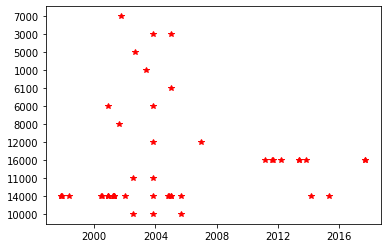

In [294]:
#Plotting Top 50 Flares

# BY START_frequency
bigFlares.sort_values("start_datetime",  ascending=True)
plt.plot(bigFlares['start_datetime'], bigFlares['start_frequency'], "*", color="red")

With respect to **start_frequency** column, the more spread of data is towards value 14000 and 16000.

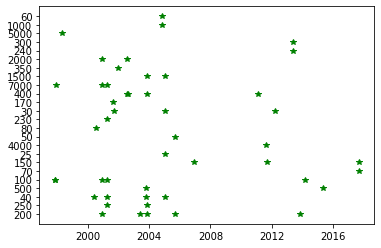

In [295]:
# BY END_frequency
bigFlares.sort_values("start_datetime", ascending=True)
plt.plot(bigFlares['start_datetime'], bigFlares['end_frequency'], '*', color="green")

Because the data points for **end_frequency** and **start_datetime** are dispersed over the plot and it is impossible to determine whether the values are increasing or declining, there is absolutely no relationship between the these two features.

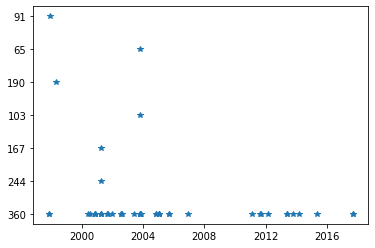

In [296]:
#BY WIDTH
bigFlares.sort_values("start_datetime", ascending=True)
bigFlares['cme_width'].replace('', np.nan, inplace=True)
bigFlares.dropna(subset=['cme_width'], inplace=True)
plt.plot(bigFlares['start_datetime'], bigFlares['cme_width'], '*')

The frequency of the top 50 flares is roughly comparable to its ceiling from the early 2000s through 2007.
There appears to be a relationship between frequency and cme width; when frequency is high, the width is consistently greater.

---



 **Plot of Halos VS Flares**

Here we create a **barplot** that compares the number (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.

In [299]:
import numpy as np
total_countTop = 0
flare_countTop = 0
total_countAll = 0
flare_countAll = 0
#Iterate over the entries to get the total number of halos in the top 50 flares dataset
for index, row in bigFlares.iterrows():
    if row['is_halo']:
        total_countTop += 1 
    else:
        flare_countTop += 1
#Iterate over the entries to get the total number of halos in theall flares Nasa Updated dataset
for index, row in updated_nasatable.iterrows():
    if row['is_halo']:
        total_countAll += 1
    else:
        flare_countAll += 1

In [300]:
# Create dataframe of the Halos from the Top 50 and All Halos
halo_data = np.array([['','Top 50 Flares','All Flares'], [True,total_countTop,total_countAll], [False,flare_countTop,flare_countAll]])

halo_dataframe = pd.DataFrame(data=halo_data[1:,1:], index=halo_data[1:,0], columns=halo_data[0,1:])

In [301]:
# Change the types to integers to be graphed

halo_dataframe['Top 50 Flares'] = halo_dataframe['Top 50 Flares'].astype(str).astype(int)
halo_dataframe['All Flares'] = halo_dataframe['All Flares'].astype(str).astype(int)

Here we plot the data on a bar graph to illustrate the distinction between both the top 50 flares either with or without halos, as well as all flares with and without halos.

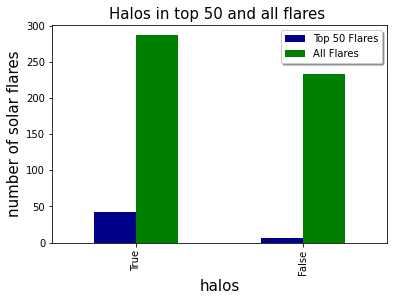

In [321]:

%matplotlib inline
halo_dataframe.plot.bar(color=['darkblue', 'green'])        
plt.legend(loc='best',fontsize = 10,shadow = True,facecolor = 'white')
plt.xlabel('halos',fontsize = 15)
plt.ylabel('number of solar flares',fontsize = 15)
plt.title('Halos in top 50 and all flares ',fontsize = 15)
plt.show()


**Plot of Flares per Month**

In [306]:
flares_per_month = []
strong_flares = []
for i in range(1,13):
    flares_per_month.append(len(updated_nasatable[updated_nasatable['start_datetime'].dt.month == i]))
    strong_flares.append(len(bigFlares[bigFlares['start_datetime'].dt.month == i]))

#calculating the percentage of strong flares in each month 
strongFlaresPerMonth = []
strFlares = []
for i in range (0,12):
    strongFlaresPerMonth.append(round((strong_flares[i]/flares_per_month[i])*100,2))
for i in range (0,12):
    strFlares.append(str(strongFlaresPerMonth[i])+'%')

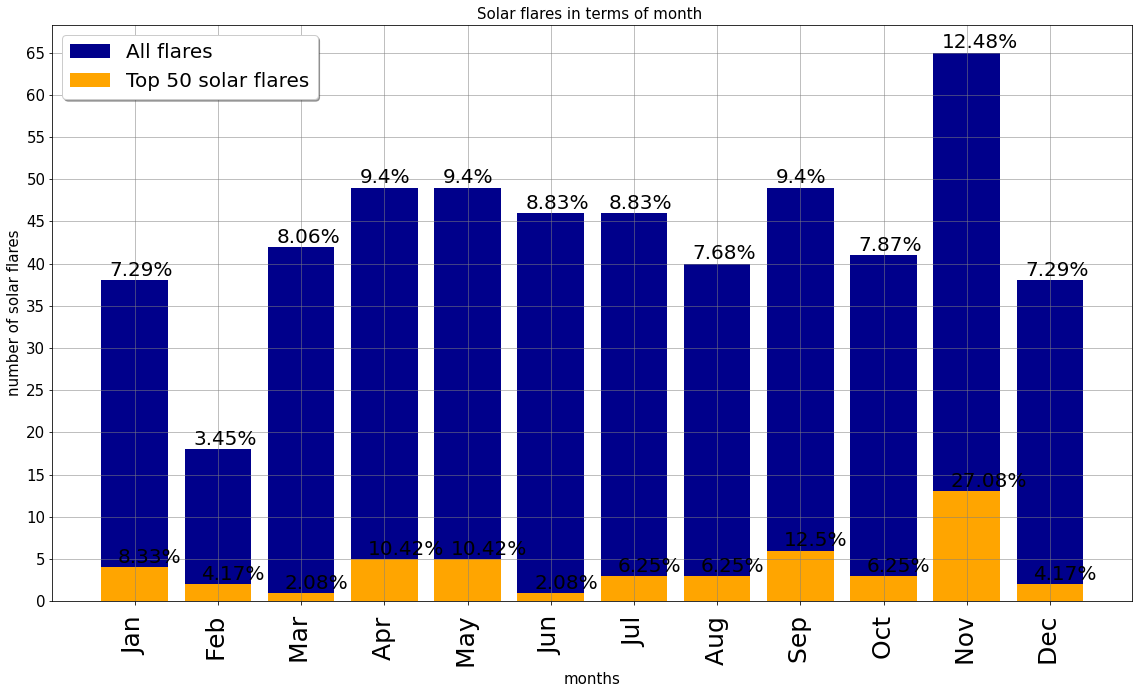

In [317]:
#Each month, the numbers of flares and the number of significant flares are represented.
#using a bar chart as a visually element to demonstrate more
import matplotlib.pyplot as plt
# assign name to each month
months = ['Jan ','Feb ','Mar ','Apr ','May ','Jun ','Jul ','Aug ','Sep ','Oct ','Nov ','Dec ']
graph = plt.figure(figsize= (15,8))
axis = graph.add_axes([0,0,1,1])
#Here we count total flares and top 50 flares and show them using different colors
count_allflares = axis.bar(months,flares_per_month,color = 'darkblue',label = 'All flares')
count_best_flares =axis.bar(months,strong_flares,color = 'orange',label = 'Top 50 solar flares')
plt.xticks(fontsize = 25,rotation = 90)
plt.yticks(np.arange(0,70,5),fontsize=15)
plt.xlabel('months',fontsize = 15)
plt.ylabel('number of solar flares',fontsize = 15)
plt.title('Solar flares in terms of month ',fontsize = 15)

# set individual bar lables using above list
for i in count_best_flares.patches:
    # get_width pulls left or right; get_y pushes up or down
        axis.text(i.get_x()+0.2, i.get_height()+0.5, \
                str(round((i.get_height()/sum(strong_flares))*100, 2))+'%', fontsize=20,
    color='black')
        
for i in count_allflares.patches:
    # get_width pulls left or right; get_y pushes up or down
        axis.text(i.get_x()+0.1, i.get_height()+0.5, \
                str(round((i.get_height()/sum(flares_per_month))*100, 2))+'%', fontsize=20,
    color='black')        
              
axis.grid(linestyle='-', linewidth='0.5', color='gray')        
plt.legend(loc='best',fontsize = 20,shadow = True,facecolor = 'white')
plt.show()

Here the barplot depicts solar flares in terrms of month. The total number of flares and top 50 flares are mostly occured in **November**  and least number of flares are in **February**. The dataspread of flares is mostly towards november and secondly in april, may and september.